In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_feature_importance(importance, names, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data = {'feature_names':feature_names, 'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

### 50-50 Split Data

In [3]:
train50 = pd.read_csv('train50.csv')
test50 = pd.read_csv('test50.csv')

In [4]:
y_train = train50['HeartDisease']
X_train = train50.drop(['HeartDisease'], axis = 1)

y_test = test50['HeartDisease']
X_test = test50.drop(['HeartDisease'], axis = 1)

In [5]:
features = X_train.columns

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [6]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tuning
param_grid = {
    'max_features': [5, 10, 15, 20]
}
# Create a base model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  41.3s
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_

{'max_features': 15}

In [ ]:
best_grid = grid_search.best_estimator_
# Make predictions on test data
grid_predictions = best_grid.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, grid_predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  73.677 %


In [7]:
# Make predictions on test data
predictions = rf.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  73.412 %


In [ ]:
# Class Errors
confuse = metrics.confusion_matrix(y_test, predictions)
print("Class No Accuracy: %f" % (confuse[0,0] / sum(confuse[0,:])))
print("Class Yes Accuracy: %f" % (confuse[1,1] / sum(confuse[1,:])))

Class No Accuracy: 0.714848
Class Yes Accuracy: 0.754703


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      5846
           1       0.71      0.75      0.73      5475

    accuracy                           0.73     11321
   macro avg       0.73      0.73      0.73     11321
weighted avg       0.74      0.73      0.73     11321



In [ ]:
# print as latex code
rep = metrics.classification_report(y_test, predictions, output_dict=True)
pdrep = pd.DataFrame(rep).transpose()
print(pdrep.style.to_latex())

\begin{tabular}{lrrrr}
{} & {precision} & {recall} & {f1-score} & {support} \\
0 & 0.756791 & 0.714848 & 0.735222 & 5846.000000 \\
1 & 0.712537 & 0.754703 & 0.733014 & 5475.000000 \\
accuracy & 0.734122 & 0.734122 & 0.734122 & 0.734122 \\
macro avg & 0.734664 & 0.734775 & 0.734118 & 11321.000000 \\
weighted avg & 0.735389 & 0.734122 & 0.734154 & 11321.000000 \\
\end{tabular}



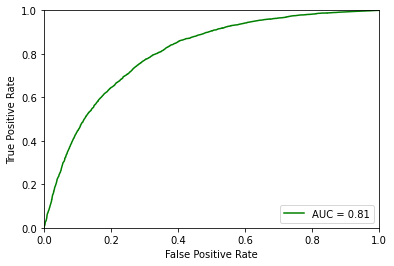

In [ ]:
# plot ROC
pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RF50_ROC.png')

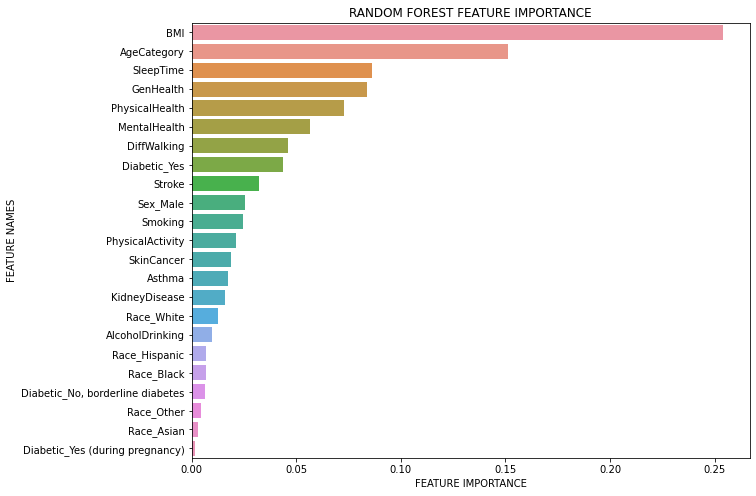

In [8]:
plot_feature_importance(rf.feature_importances_, features, 'RANDOM FOREST')
plt.savefig('rf_fi.png')

### SMOTE

In [ ]:
os_train = pd.read_csv('train_smoted.csv')
os_test = pd.read_csv('test_smoted.csv')

In [ ]:
y_train = os_train['HeartDisease']
X_train = os_train.drop(['HeartDisease'], axis = 1)

y_test = os_test['HeartDisease']
X_test = os_test.drop(['HeartDisease'], axis = 1)

In [ ]:
features = X_train.columns

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tuning
param_grid = {
    'max_features': [5, 10, 15, 20]
}
# Create a base model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  41.3s
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_

{'max_features': 15}

In [ ]:
best_grid = grid_search.best_estimator_
# Make predictions on test data
grid_predictions = best_grid.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, grid_predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  73.677 %


In [ ]:
# Make predictions on test data
predictions = rf.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  87.199 %


In [ ]:
# Class Errors
confuse = metrics.confusion_matrix(y_test, predictions)
print("Class No Accuracy: %f" % (confuse[0,0] / sum(confuse[0,:])))
print("Class Yes Accuracy: %f" % (confuse[1,1] / sum(confuse[1,:])))

Class No Accuracy: 0.932250
Class Yes Accuracy: 0.225688


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5845
           1       0.24      0.23      0.23       545

    accuracy                           0.87      6390
   macro avg       0.58      0.58      0.58      6390
weighted avg       0.87      0.87      0.87      6390



In [ ]:
# print as latex code
rep = metrics.classification_report(y_test, predictions, output_dict=True)
pdrep = pd.DataFrame(rep).transpose()
print(pdrep.style.to_latex())

\begin{tabular}{lrrrr}
{} & {precision} & {recall} & {f1-score} & {support} \\
0 & 0.928121 & 0.932250 & 0.930181 & 5845.000000 \\
1 & 0.236994 & 0.225688 & 0.231203 & 545.000000 \\
accuracy & 0.871987 & 0.871987 & 0.871987 & 0.871987 \\
macro avg & 0.582558 & 0.578969 & 0.580692 & 6390.000000 \\
weighted avg & 0.869175 & 0.871987 & 0.870565 & 6390.000000 \\
\end{tabular}



Text(0.5, 0, 'False Positive Rate')

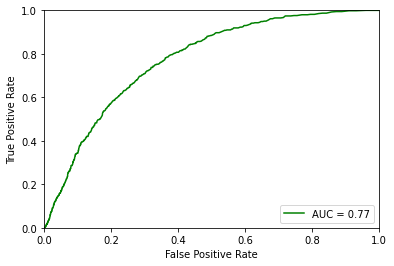

In [ ]:
# plot ROC
pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('RF50_ROC.png')

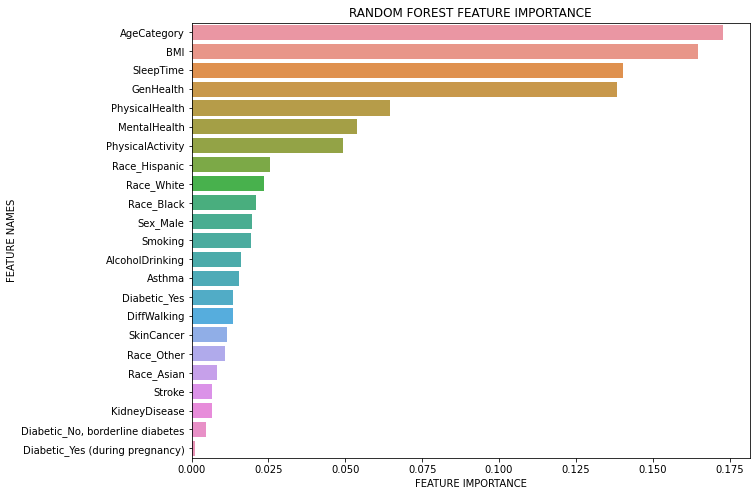

In [ ]:
plot_feature_importance(rf.feature_importances_, features, 'RANDOM FOREST')

### Stratified

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
y_train = train['HeartDisease']
X_train = train.drop(['HeartDisease'], axis = 1)

y_test = test['HeartDisease']
X_test = test.drop(['HeartDisease'], axis = 1)

In [ ]:
features = X_train.columns

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tuning
param_grid = {
    'max_features': [5, 10, 15, 20]
}
# Create a base model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  42.1s
[CV] END .....................................max_features=5; total time=  41.3s
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=10; total time= 1.0min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=15; total time= 1.3min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_features=20; total time= 1.7min
[CV] END ....................................max_

{'max_features': 15}

In [ ]:
best_grid = grid_search.best_estimator_
# Make predictions on test data
grid_predictions = best_grid.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, grid_predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  73.677 %


In [ ]:
# Make predictions on test data
predictions = rf.predict(X_test)
# Performance
acc = round(metrics.accuracy_score(y_test, predictions)*100, 3)
print("Accuracy: ", acc, '%')

Accuracy:  91.205 %


In [ ]:
# Class Errors
confuse = metrics.confusion_matrix(y_test, predictions)
print("Class No Accuracy: %f" % (confuse[0,0] / sum(confuse[0,:])))
print("Class Yes Accuracy: %f" % (confuse[1,1] / sum(confuse[1,:])))

Class No Accuracy: 0.989222
Class Yes Accuracy: 0.084404


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5845
           1       0.42      0.08      0.14       545

    accuracy                           0.91      6390
   macro avg       0.67      0.54      0.55      6390
weighted avg       0.88      0.91      0.88      6390



In [ ]:
# print as latex code
rep = metrics.classification_report(y_test, predictions, output_dict=True)
pdrep = pd.DataFrame(rep).transpose()
print(pdrep.style.to_latex())

\begin{tabular}{lrrrr}
{} & {precision} & {recall} & {f1-score} & {support} \\
0 & 0.920554 & 0.989222 & 0.953653 & 5845.000000 \\
1 & 0.422018 & 0.084404 & 0.140673 & 545.000000 \\
accuracy & 0.912050 & 0.912050 & 0.912050 & 0.912050 \\
macro avg & 0.671286 & 0.536813 & 0.547163 & 6390.000000 \\
weighted avg & 0.878034 & 0.912050 & 0.884315 & 6390.000000 \\
\end{tabular}



Text(0.5, 0, 'False Positive Rate')

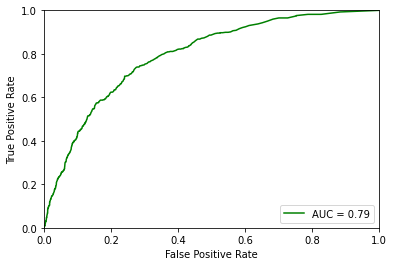

In [ ]:
# plot ROC
pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('RF50_ROC.png')

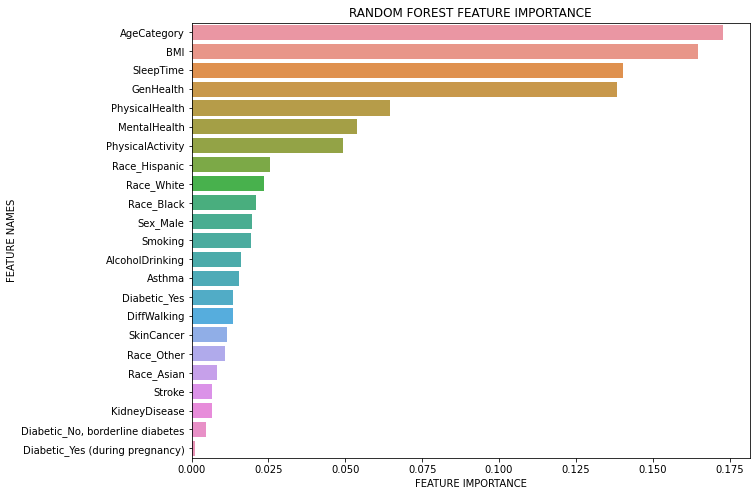

In [ ]:
plot_feature_importance(rf.feature_importances_, features, 'RANDOM FOREST')